##### Note: This model does not yet include regen inforation. That will be added soon

In [2]:
# Import all the packages we care about
import numpy as np
import random
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Cell Discharge Model

In [2]:
# Load in the dataset (interpolated values are recommended to ensure we have at least ~10 unique datapoints per feature)
discharge_data = np.loadtxt('Datasets/molicel_p42a_discharging_interpolated_dataset.csv', delimiter = ',')
# Split the dataset into our input features (X) and output values (Y)
discharge_x = discharge_data[:,0:-1]
discharge_y = discharge_data[:,-1:] 
num_discharge_samples = np.shape(discharge_data)[0]

print("Your dataset has", num_discharge_samples, "elements with", np.shape(discharge_x)[1], "features")

Your dataset has 1328 elements with 3 features


Best Degree: 7
Min Cost: 10.167644195847524


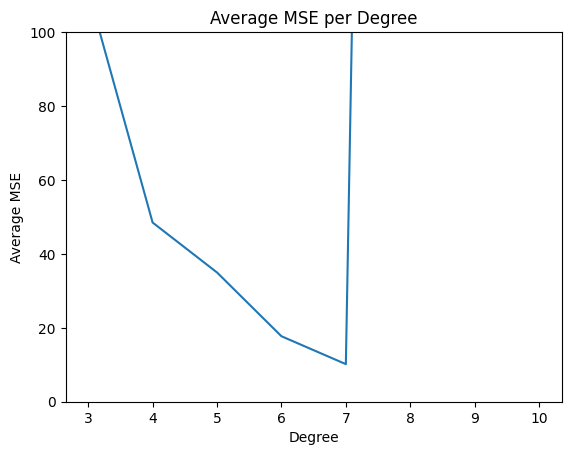

In [3]:
# Set the range of polynomial degrees to try
min_discharge_degree = 3
max_discharge_degree = 11
discharge_test_error = np.zeros(max_discharge_degree - min_discharge_degree)
# Set the number of different test/train datasets to randomly generate and train + test on
discharge_num_iterations = 100

for j in range(discharge_num_iterations):
    # Randomly select 10% of the dataset for testing 
    test_index = random.sample(range(num_discharge_samples), int(num_discharge_samples/10))
    # Use the remaining 90% of the dataset for training
    train_index = []
    for i in range(num_discharge_samples):
        if(i not in test_index):
            train_index.append(i)

    # Create the training and testing datasets
    x_test = discharge_x[test_index]
    y_test = discharge_y[test_index]
    x_train = discharge_x[train_index]
    y_train = discharge_y[train_index]

    # Train + test models in the range of polynomial degrees on the dataset
    for i in range(min_discharge_degree, max_discharge_degree):
        model_degree = i

        # Transform input dataset into polynomial feature expansion 
        poly = PolynomialFeatures(degree=model_degree)
        x_trans = poly.fit_transform(x_train)
        # Perform linear regression on transformed training dataset
        lin_model = LinearRegression(fit_intercept=False)
        lin_model.fit(x_trans, y_train)
        # Evaluate MSE between testing dataset and model predictions 
        y_prediction = lin_model.predict(poly.fit_transform(x_test)) 
        discharge_test_error[i-min_discharge_degree] += (mean_squared_error(y_test,y_prediction))

# Calculate average error for each degree across all iterations 
discharge_test_error /= discharge_num_iterations

# Return whichever polynomial degree produced minimum error on testing set on average
best_degree = range(min_discharge_degree, max_discharge_degree)[np.argmin(discharge_test_error)]
print("Best Degree:", best_degree)
print("Min Cost:", np.min(discharge_test_error))

# Plot the average error for each degree to validate performance visually 
plt.plot(range(min_discharge_degree,max_discharge_degree), discharge_test_error)
plt.ylim(top=100, bottom=0)
plt.xlabel("Degree")
plt.ylabel("Average MSE")
plt.title("Average MSE per Degree")
plt.show()

In [4]:
# Using the best polynomial degree, train a model on all data
discharge_poly_feat = PolynomialFeatures(degree=best_degree)
x_trans = discharge_poly_feat.fit_transform(discharge_x)
discharge_lin_reg = LinearRegression(fit_intercept=False)
discharge_lin_reg.fit(x_trans, discharge_y)
# Then compare its predictions to the real outputs
y_pred = discharge_lin_reg.predict(x_trans) 
# Print some statistics about the error between predictions and real values
print("Model Training Error")
print("MSE:", mean_squared_error(discharge_y,y_pred)) 
print("Std Dev:", np.std(discharge_y - y_pred))

Model Training Error
MSE: 7.732514137271776
Std Dev: 2.7807373793114567


In [5]:
def map_temp_dur_soc_to_discharge_power(cell_temperature, duration, soc):
    test_val = np.array([cell_temperature, duration, soc]).reshape(1, -1)
    return discharge_lin_reg.predict(discharge_poly_feat.fit_transform(test_val))[0][0]

# Cell Charge Model

In [6]:
# Load in the dataset (interpolated values are recommended to ensure we have at least ~10 unique datapoints per feature)
charge_data = np.loadtxt('Datasets/molicel_p42a_charging_interpolated_dataset.csv', delimiter = ',')
# Split the dataset into our input features (X) and output values (Y)
charge_x = charge_data[:,0:-1]
charge_y = charge_data[:,-1:] 
charge_num_samples = np.shape(charge_data)[0]

print("Your dataset has", charge_num_samples, "elements with", np.shape(charge_x)[1], "features")

Your dataset has 1328 elements with 3 features


Best Degree: 6
Min Cost: 19.773819934146886


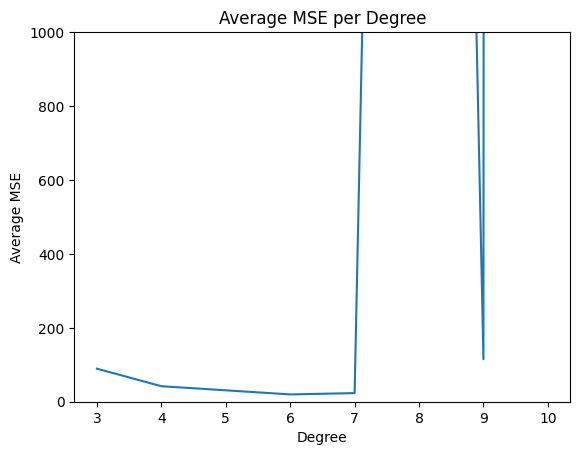

In [24]:
# Set the range of polynomial degrees to try
charge_min_degree = 3
charge_max_degree = 11
charge_test_error = np.zeros(charge_max_degree - charge_min_degree)
# Set the number of different test/train datasets to randomly generate and train + test on
charge_num_iterations = 100

for j in range(charge_num_iterations):
    # Randomly select 10% of the dataset for testing 
    test_index = random.sample(range(charge_num_samples), int(charge_num_samples/10))
    # Use the remaining 90% of the dataset for training
    train_index = []
    for i in range(charge_num_samples):
        if(i not in test_index):
            train_index.append(i)

    # Create the training and testing datasets
    x_test = charge_x[test_index]
    y_test = charge_y[test_index]
    x_train = charge_x[train_index]
    y_train = charge_y[train_index]

    # Train + test models in the range of polynomial degrees on the dataset
    for i in range(charge_min_degree, charge_max_degree):
        model_degree = i

        # Transform input dataset into polynomial feature expansion 
        poly = PolynomialFeatures(degree=model_degree)
        x_trans = poly.fit_transform(x_train)
        # Perform linear regression on transformed training dataset
        lin_model = LinearRegression(fit_intercept=False)
        lin_model.fit(x_trans, y_train)
        # Evaluate MSE between testing dataset and model predictions 
        y_prediction = lin_model.predict(poly.fit_transform(x_test)) 
        charge_test_error[i-charge_min_degree] += (mean_squared_error(y_test,y_prediction))

# Calculate average error for each degree across all iterations 
charge_test_error /= charge_num_iterations

# Return whichever polynomial degree produced minimum error on testing set on average
charge_best_degree = range(charge_min_degree, charge_max_degree)[np.argmin(charge_test_error)]
print("Best Degree:", charge_best_degree)
print("Min Cost:", np.min(charge_test_error))

# Plot the average error for each degree to validate performance visually 
plt.plot(range(charge_min_degree,charge_max_degree), charge_test_error)
plt.ylim(top=1000, bottom=0)
plt.xlabel("Degree")
plt.ylabel("Average MSE")
plt.title("Average MSE per Degree")
plt.show()

In [8]:
# Using the best polynomial degree, train a model on all data
charge_poly_feat = PolynomialFeatures(degree=charge_best_degree)
x_trans = charge_poly_feat.fit_transform(charge_x)
charge_lin_reg = LinearRegression(fit_intercept=False)
charge_lin_reg.fit(x_trans, charge_y)
# Then compare its predictions to the real outputs
y_pred = charge_lin_reg.predict(x_trans) 
# Print some statistics about the error between predictions and real values
print("Model Training Error")
print("MSE:", mean_squared_error(charge_y,y_pred)) 
print("Std Dev:", np.std(charge_y - y_pred))

Model Training Error
MSE: 16.923047962525246
Std Dev: 4.113763159025309


In [9]:
def map_temp_dur_soc_to_charge_power(cell_temperature, duration, soc):
    test_val = np.array([cell_temperature, duration, soc]).reshape(1, -1)
    return charge_lin_reg.predict(charge_poly_feat.fit_transform(test_val))[0][0]

# State of Charge to Voltage Map

Your dataset has 421 elements with 1 features


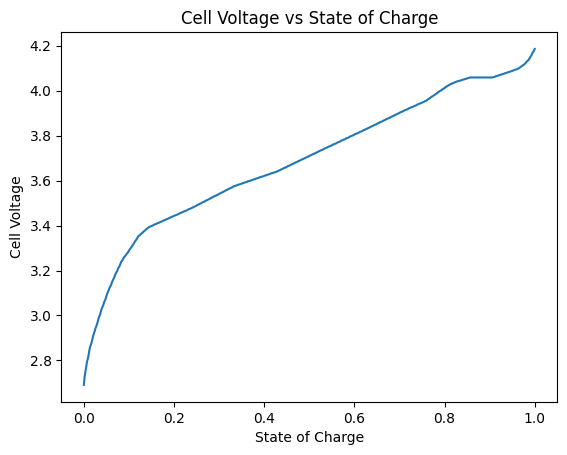

In [10]:
# Load in the dataset (interpolated values are recommended to ensure we have at least ~10 unique datapoints per feature)
soc_data = np.loadtxt('Datasets/molicel_p42a_soc_voltage.csv', delimiter = ',')
# Split the dataset into our input features (X) and output values (Y)
soc_x = soc_data[:,0:-1]
soc_y = soc_data[:,-1:] 
soc_num_samples = np.shape(soc_data)[0]

print("Your dataset has", soc_num_samples, "elements with", np.shape(soc_x)[1], "features")

plt.plot(soc_x, soc_y)
plt.xlabel("State of Charge")
plt.ylabel("Cell Voltage")
plt.title("Cell Voltage vs State of Charge")
plt.show()

Best Degree: 30
Min Cost: 2.0564546681146434e-06


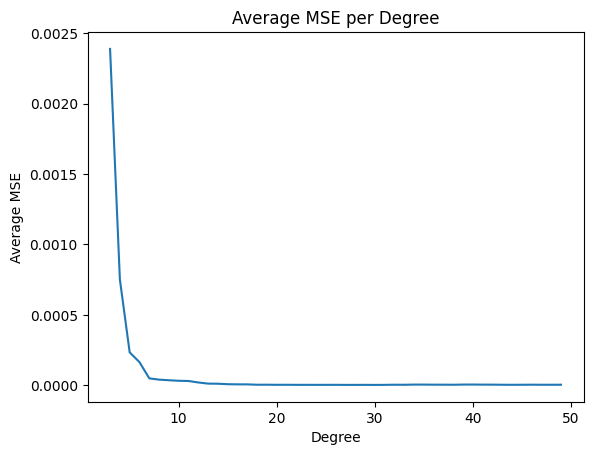

In [11]:
# Set the range of polynomial degrees to try
soc_min_degree = 3
soc_max_degree = 50
soc_test_error = np.zeros(soc_max_degree - soc_min_degree)
# Set the number of different test/train datasets to randomly generate and train + test on
soc_num_iterations = 100

for j in range(soc_num_iterations):
    # Randomly select 10% of the dataset for testing 
    test_index = random.sample(range(soc_num_samples), int(soc_num_samples/10))
    # Use the remaining 90% of the dataset for training
    train_index = []
    for i in range(soc_num_samples):
        if(i not in test_index):
            train_index.append(i)

    # Create the training and testing datasets
    x_test = soc_x[test_index]
    y_test = soc_y[test_index]
    x_train = soc_x[train_index]
    y_train = soc_y[train_index]

    # Train + test models in the range of polynomial degrees on the dataset
    for i in range(soc_min_degree, soc_max_degree):
        model_degree = i

        # Transform input dataset into polynomial feature expansion 
        poly = PolynomialFeatures(degree=model_degree)
        x_trans = poly.fit_transform(x_train)
        # Perform linear regression on transformed training dataset
        lin_model = LinearRegression(fit_intercept=False)
        lin_model.fit(x_trans, y_train)
        # Evaluate MSE between testing dataset and model predictions 
        y_prediction = lin_model.predict(poly.fit_transform(x_test)) 
        soc_test_error[i-soc_min_degree] += (mean_squared_error(y_test,y_prediction))

# Calculate average error for each degree across all iterations 
soc_test_error /= soc_num_iterations

# Return whichever polynomial degree produced minimum error on testing set on average
best_degree = range(soc_min_degree, soc_max_degree)[np.argmin(soc_test_error)]
print("Best Degree:", best_degree)
print("Min Cost:", np.min(soc_test_error))

# Plot the average error for each degree to validate performance visually 
plt.plot(range(soc_min_degree,soc_max_degree), soc_test_error)
# plt.ylim(top=1000, bottom=0)
plt.xlabel("Degree")
plt.ylabel("Average MSE")
plt.title("Average MSE per Degree")
plt.show()

In [12]:
# Using the best polynomial degree, train a model on all data
soc_poly_feat = PolynomialFeatures(degree=best_degree)
x_trans = soc_poly_feat.fit_transform(soc_x)
soc_lin_reg = LinearRegression(fit_intercept=False)
soc_lin_reg.fit(x_trans, soc_y)
# Then compare its predictions to the real outputs
y_pred = soc_lin_reg.predict(x_trans) 
# Print some statistics about the error between predictions and real values
print("Model Training Error")
print("MSE:", mean_squared_error(soc_y,y_pred)) 
print("Std Dev:", np.std(soc_y - y_pred))

Model Training Error
MSE: 1.7521650153971424e-06
Std Dev: 0.0013159770867887206


In [13]:
def map_soc_to_voltage(soc):
    test_val = np.array([soc]).reshape(1, -1)
    return soc_lin_reg.predict(soc_poly_feat.fit_transform(test_val))[0][0]

# Efficiency Map

In [14]:
# Load in the dataset (interpolated values are recommended to ensure we have at least ~10 unique datapoints per feature)
efficiency_data = np.loadtxt('Datasets/emrax_228_efficiency_dataset.csv', delimiter = ',')
# Split the dataset into our input features (X) and output values (Y)
efficiency_x = efficiency_data[:,0:-1]
efficiency_y = efficiency_data[:,-1:] 
efficiency_num_samples = np.shape(efficiency_data)[0]

print("Your dataset has", efficiency_num_samples, "elements with", np.shape(efficiency_x)[1], "features")

Your dataset has 360 elements with 2 features


Best Degree: 3
Min Cost: 1.0360503546261008


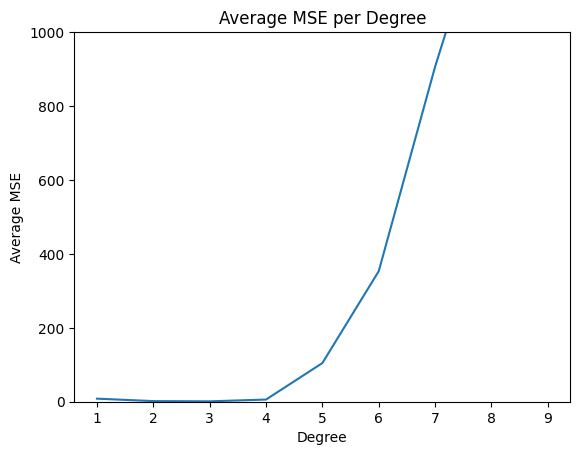

In [15]:
# Set the range of polynomial degrees to try
efficiency_min_degree = 1
efficiency_max_degree = 10
efficiency_test_error = np.zeros(efficiency_max_degree - efficiency_min_degree)
# Set the number of different test/train datasets to randomly generate and train + test on
efficiency_num_iterations = 100

for j in range(efficiency_num_iterations):
    # Randomly select 10% of the dataset for testing 
    test_index = random.sample(range(efficiency_num_samples), int(efficiency_num_samples/10))
    # Use the remaining 90% of the dataset for training
    train_index = []
    for i in range(efficiency_num_samples):
        if(i not in test_index):
            train_index.append(i)

    # Create the training and testing datasets
    x_test = efficiency_x[test_index]
    y_test = efficiency_y[test_index]
    x_train = efficiency_x[train_index]
    y_train = efficiency_y[train_index]

    # Train + test models in the range of polynomial degrees on the dataset
    for i in range(efficiency_min_degree, efficiency_max_degree):
        model_degree = i

        # Transform input dataset into polynomial feature expansion 
        poly = PolynomialFeatures(degree=model_degree)
        x_trans = poly.fit_transform(x_train)
        # Perform linear regression on transformed training dataset
        lin_model = LinearRegression(fit_intercept=False)
        lin_model.fit(x_trans, y_train)
        # Evaluate MSE between testing dataset and model predictions 
        y_prediction = lin_model.predict(poly.fit_transform(x_test)) 
        efficiency_test_error[i-efficiency_min_degree] += (mean_squared_error(y_test,y_prediction))

# Calculate average error for each degree across all iterations 
efficiency_test_error /= efficiency_num_iterations

# Return whichever polynomial degree produced minimum error on testing set on average
efficiency_best_degree = range(efficiency_min_degree, efficiency_max_degree)[np.argmin(efficiency_test_error)]
print("Best Degree:", efficiency_best_degree)
print("Min Cost:", np.min(efficiency_test_error))

# Plot the average error for each degree to validate performance visually 
plt.plot(range(efficiency_min_degree,efficiency_max_degree), efficiency_test_error)
plt.ylim(top=1000, bottom=0)
plt.xlabel("Degree")
plt.ylabel("Average MSE")
plt.title("Average MSE per Degree")
plt.show()

In [16]:
# Using the best polynomial degree, train a model on all data
efficiency_poly_feat = PolynomialFeatures(degree=efficiency_best_degree)
x_trans = efficiency_poly_feat.fit_transform(efficiency_x)
efficiency_lin_reg = LinearRegression(fit_intercept=False)
efficiency_lin_reg.fit(x_trans, efficiency_y)
# Then compare its predictions to the real outputs
y_pred = efficiency_lin_reg.predict(x_trans) 
# Print some statistics about the error between predictions and real values
print("Model Training Error")
print("MSE:", mean_squared_error(efficiency_y,y_pred)) 
print("Std Dev:", np.std(efficiency_y - y_pred))

Model Training Error
MSE: 0.9773004595430883
Std Dev: 0.9885850795664991


In [17]:
def map_torque_rpm_to_efficiency(torque, rpm):
    test_val = np.array([torque, rpm]).reshape(1, -1)
    return efficiency_lin_reg.predict(efficiency_poly_feat.fit_transform(test_val))[0][0]

# Drivetrain Model

In [18]:
# Constants used in calculation
pts_const = 9548.8 
series_count = 140 # cells
cell_capacity = 4200 # mAh
battery_ir = 0.56 # ohms
rules_power_limit = 80 # kW
motor_peak_power = 124 # kW # This will never be used unless the rules limit increases or we are ignoring it for testing

# Soc: State of Charge [0, 1.0]
# Torque: nm [0, 230]
# RPM: RPM [0, 6500]
# Duration: Seconds [1, 30]
# Temperature: Degrees C [-10, 55]

## Discharge

In [19]:
def drivetrain_discharge_model(soc, torque, rpm, duration, temperature):
    # First we calculate the power that would be required by the motor to achieve the requested torque at this RPM 
    requested_motor_power = torque * rpm / pts_const
    efficiency = map_torque_rpm_to_efficiency(torque, rpm)/100
    requested_motor_total_power = requested_motor_power/efficiency

    # Second, calculate how much power the battery can provide right now
    battery_total_power_limit = 560*map_temp_dur_soc_to_discharge_power(temperature, duration, soc*100)/1000 # in kW
    battery_total_power_limit = battery_total_power_limit if battery_total_power_limit > 0 else 0
    battery_voltage = series_count*map_soc_to_voltage(soc)
    battery_current = 1000*battery_total_power_limit / battery_voltage
    battery_heat = battery_current**2 * battery_ir/1000

    # Compare power limitations from all systems and use the lowest limit
    power_limit_arr = [requested_motor_total_power, battery_total_power_limit, rules_power_limit, motor_peak_power]
    power_limit_reason = ["Request", "Battery", "Rules", "Motor"][np.argmin(power_limit_arr)]
    motor_total_power = min(power_limit_arr)

    # Set up some variables we can overwrite when we update the efficiency
    efficiency_diff = 1
    motor_power = 0
    delivered_torque = 0

    # Iteratively update to find the correct efficiency for the new equilibrium state
    while efficiency_diff > 0.001: 
        motor_power = motor_total_power * efficiency
        delivered_torque = motor_power * pts_const / rpm
        new_efficiency = map_torque_rpm_to_efficiency(delivered_torque, rpm)/100
        efficiency_diff = np.abs(efficiency - new_efficiency)
        efficiency = new_efficiency

    # Calculate some generally helpful values
    motor_heat = motor_total_power - motor_power
    battery_current = 1000*motor_total_power / battery_voltage
    battery_heat = battery_current**2 * battery_ir/1000
    battery_total_power = motor_total_power + battery_heat
    battery_efficiency = motor_total_power / battery_total_power

    # print("Delivered Torque (nm):", delivered_torque)
    # print("Motor Efficiency:", efficiency)
    # print("Motor Heat(kW):", motor_heat)
    # print("Battery Efficiency:", battery_efficiency)
    # print("Battery Heat(kW):", battery_heat)
    # print("Battery Total Power Output(kW):", battery_total_power)
    # print("Power Limit Reason:", power_limit_reason)
    return (delivered_torque, efficiency, motor_heat, battery_efficiency, battery_heat, battery_total_power, power_limit_reason)

### Use the function

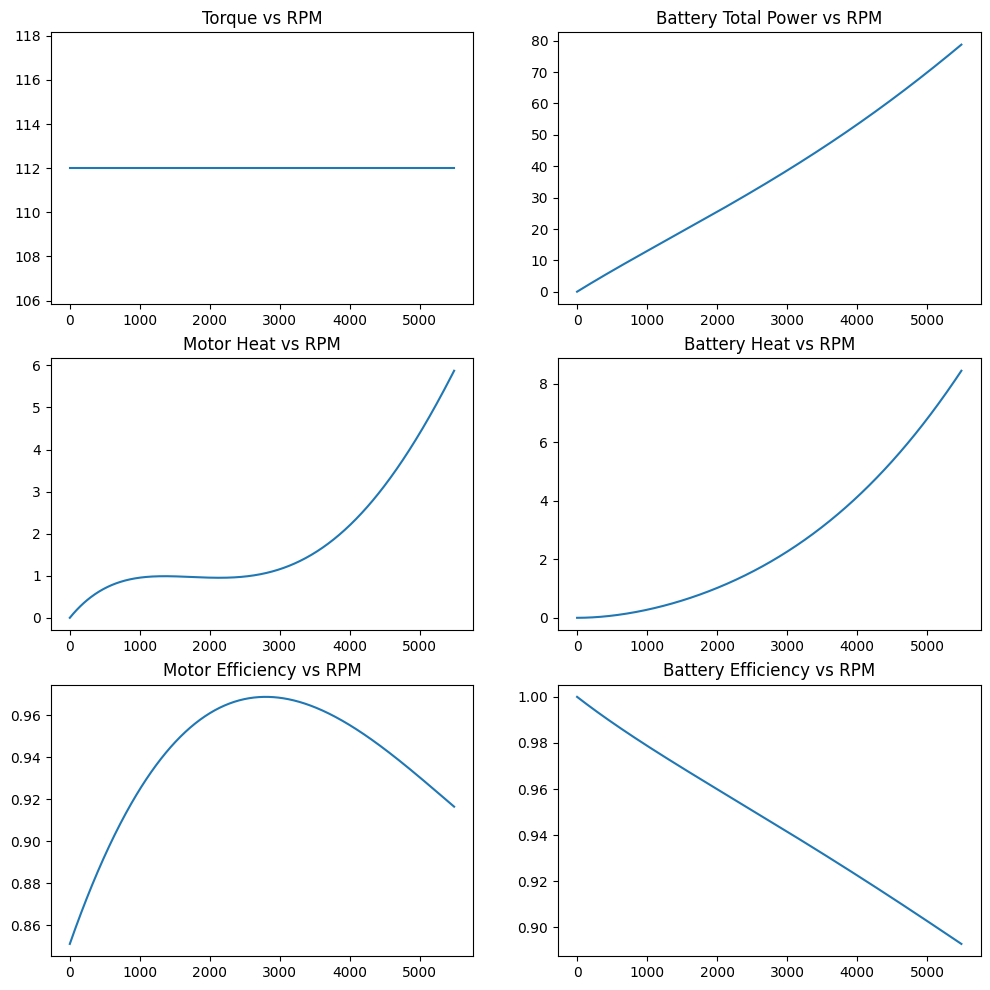

In [20]:
battery_soc = 0.95 # %
requested_torque = 112 # nm
motor_rpm = 5000 # rpm
discharge_duration = 1 # seconds
cell_temperature = 55 # degrees C

torque_arr = []
motor_efficiency_arr = []
motor_heat_arr = []
battery_efficiency_arr = []
battery_heat_arr = []
battery_total_power_arr = []

rpm_range = np.arange(1, 5501, 10)
for i in rpm_range:
    motor_rpm = i
    delivered_torque, motor_efficiency, motor_heat, battery_efficiency, battery_heat, battery_total_power, power_limit_reason = drivetrain_discharge_model(battery_soc, requested_torque, motor_rpm, discharge_duration, cell_temperature)
    torque_arr.append(delivered_torque)
    motor_efficiency_arr.append(motor_efficiency)
    motor_heat_arr.append(motor_heat)
    battery_efficiency_arr.append(battery_efficiency)
    battery_heat_arr.append(battery_heat)
    battery_total_power_arr.append(battery_total_power)

fig, axs = plt.subplots(3,2)
axs[0,0].plot(rpm_range, torque_arr)
axs[0,0].set_title("Torque vs RPM")
axs[1,0].plot(rpm_range, motor_heat_arr)
axs[1,0].set_title("Motor Heat vs RPM")
axs[2,0].plot(rpm_range, motor_efficiency_arr)
axs[2,0].set_title("Motor Efficiency vs RPM")
axs[0,1].plot(rpm_range, battery_total_power_arr)
axs[0,1].set_title("Battery Total Power vs RPM")
axs[1,1].plot(rpm_range, battery_heat_arr)
axs[1,1].set_title("Battery Heat vs RPM")
axs[2,1].plot(rpm_range, battery_efficiency_arr)
axs[2,1].set_title("Battery Efficiency vs RPM")
fig.set_size_inches(12,12)


## Regen

In [21]:
def drivetrain_charge_model(soc, torque, rpm, duration, temperature):
    # First we calculate the power that would be required by the motor to achieve the requested torque at this RPM 
    requested_motor_power = torque * rpm / pts_const
    efficiency = map_torque_rpm_to_efficiency(torque, rpm)/100
    requested_motor_total_power = requested_motor_power/efficiency

    # Second, calculate how much power the battery can absorb right now
    battery_total_power_limit = 560*map_temp_dur_soc_to_charge_power(temperature, duration, soc*100)/1000 # in kW
    battery_total_power_limit = battery_total_power_limit if battery_total_power_limit > 0 else 0
    battery_voltage = series_count*map_soc_to_voltage(soc)
    battery_current = 1000*battery_total_power_limit / battery_voltage
    battery_heat = battery_current**2 * battery_ir/1000

    # Compare power limitations from all systems and use the lowest limit
    power_limit_arr = [requested_motor_total_power, battery_total_power_limit, rules_power_limit, motor_peak_power]
    power_limit_reason = ["Request", "Battery", "Rules", "Motor"][np.argmin(power_limit_arr)]
    motor_total_power = min(power_limit_arr)

    # Set up some variables we can overwrite when we update the efficiency
    efficiency_diff = 1
    motor_power = 0
    delivered_torque = 0

    # Iteratively update to find the correct efficiency for the new equilibrium state
    while efficiency_diff > 0.001: 
        motor_power = motor_total_power * efficiency
        delivered_torque = motor_power * pts_const / rpm
        new_efficiency = map_torque_rpm_to_efficiency(delivered_torque, rpm)/100
        efficiency_diff = np.abs(efficiency - new_efficiency)
        efficiency = new_efficiency

    # Calculate some generally helpful values
    motor_heat = motor_total_power - motor_power
    battery_current = 1000*motor_total_power / battery_voltage
    battery_heat = battery_current**2 * battery_ir/1000
    battery_total_power = motor_total_power + battery_heat
    battery_efficiency = motor_total_power / battery_total_power

    print("Delivered Torque (nm):", delivered_torque)
    print("Motor Efficiency:", efficiency)
    print("Motor Heat(kW):", motor_heat)
    print("Battery Efficiency:", battery_efficiency)
    print("Battery Heat(kW):", battery_heat)
    print("Battery Total Power Output(kW):", battery_total_power)
    print("Power Limit Reason:", power_limit_reason)
    return (delivered_torque, efficiency, motor_heat, battery_efficiency, battery_heat, battery_total_power, power_limit_reason)

In [25]:
drivetrain_charge_model(0.7, 100, 5000, 5, 50)

Delivered Torque (nm): 89.73821675380279
Motor Efficiency: 0.9131250104953901
Motor Heat(kW): 4.424843366052215
Battery Efficiency: 0.9119548701494953
Battery Heat(kW): 4.963800188437864
Battery Total Power Output(kW): 56.377907521586884
Power Limit Reason: Battery


(89.73821675380279,
 0.9131250104953901,
 4.424843366052215,
 0.9119548701494953,
 4.963800188437864,
 56.377907521586884,
 'Battery')

# Power Consumption

## Ben's Dataset

RPM: 2291.9647382021512
Torque: 107.27054644038617
Power: 27501.878743551682
Pack Energy Capacity (Wh): 8680.0
Discharge Duration (minutes): 18.936888088858694
Average Endurance Duration (minutes): 30


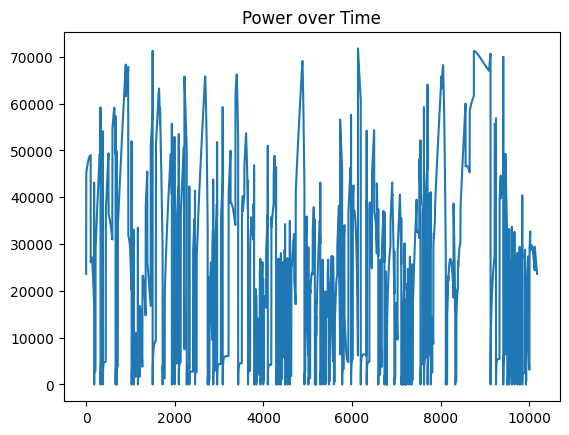

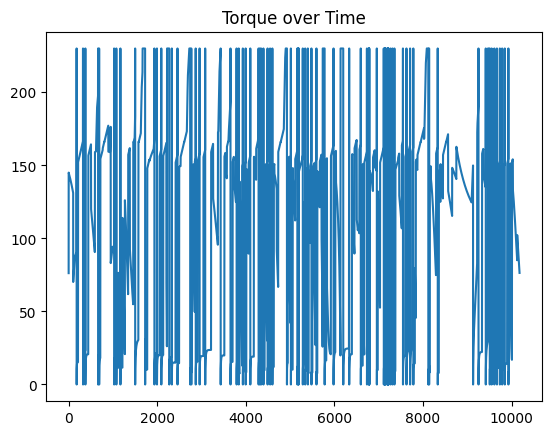

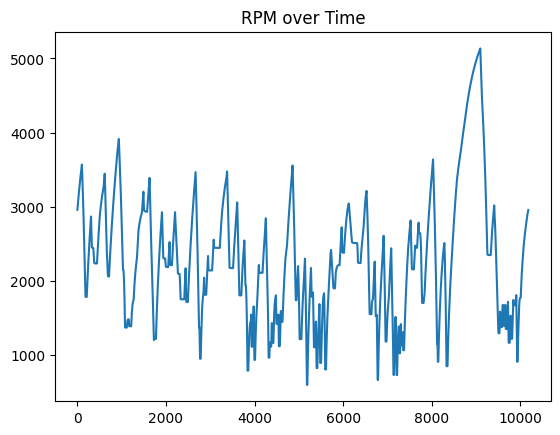

In [6]:
# Load in the dataset
endurance_data = np.loadtxt('Datasets/endurance_rpm_torque.csv', delimiter = ',')
# Split the data into the relevant features
endurance_rpm = endurance_data[:,0]
endurance_torque = endurance_data[:,2] 
endurance_num_samples = np.shape(endurance_data)[0]

# Calculate the power at each of these timesteps
endurance_power = endurance_rpm * endurance_torque / 9.5488

# Calculate averages just for some quick napkin math that doesn't consider heat and efficiency yet
rpm_mean = np.mean(endurance_rpm)
torque_mean = np.mean(endurance_torque)
power_mean = np.mean(endurance_power)

print("RPM:", rpm_mean)
print("Torque:", torque_mean)
print("Power:", power_mean)

# At this power consumption, how quickly do we drain the pack? 
cell_energy_capacity = 15.5 #Wh
num_cells = 560
pack_energy_capacity = cell_energy_capacity*num_cells
print("Pack Energy Capacity (Wh):", pack_energy_capacity)

# With this energy capacity and this mean power consumption, we can calculate discharge duration 
discharge_duration = 60*pack_energy_capacity / power_mean
print("Discharge Duration (minutes):", discharge_duration)
print("Average Endurance Duration (minutes): 30")

plt.plot(np.arange(0, endurance_num_samples), endurance_power)
plt.title("Power over Time")
plt.show()

plt.plot(np.arange(0, endurance_num_samples), endurance_torque)
plt.title("Torque over Time")
plt.show()

plt.plot(np.arange(0, endurance_num_samples), endurance_rpm)
plt.title("RPM over Time")
plt.show()

## Jake's Dataset

Average Torque (nm): 123.08339763734098
Average RPM: 2428.61472048528
Average Power (kW): 31.346370023107198
Discharge Time (min): 16.614363947598672


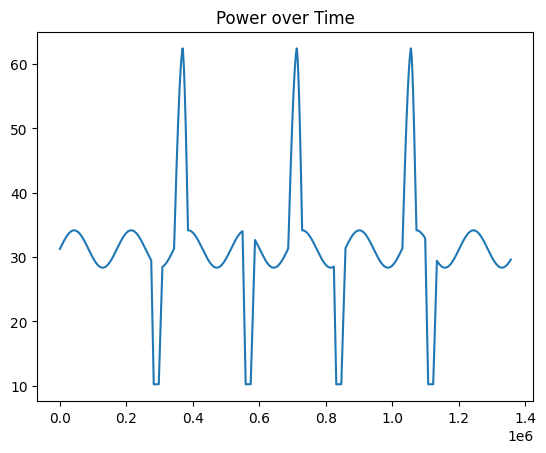

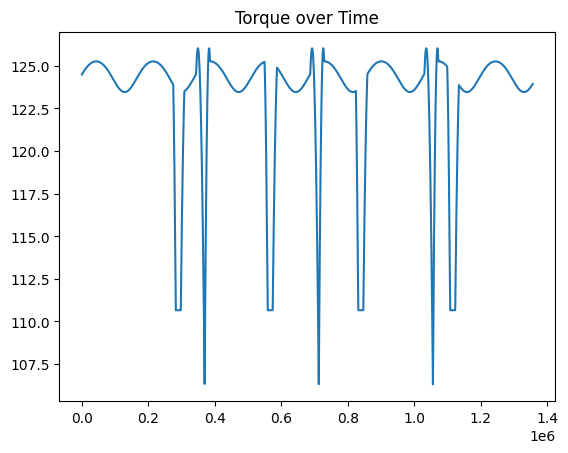

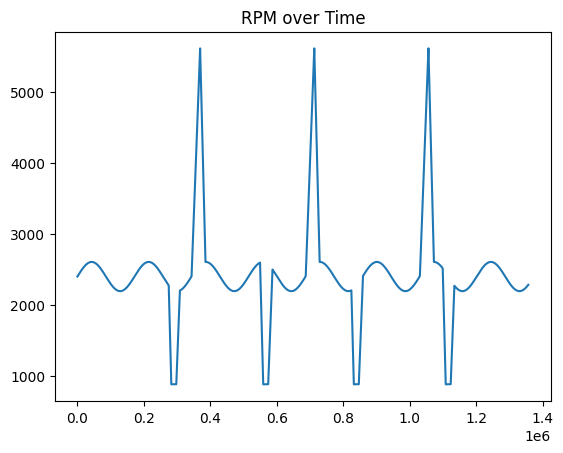

In [11]:
# Load in the dataset
jake_endurance_torque = np.loadtxt('Datasets/torque.csv', delimiter = ',')
jake_endurance_rpm = np.loadtxt('Datasets/rpm.csv', delimiter = ',')
jake_endurance_power = jake_endurance_rpm * jake_endurance_torque / 9548.8
jake_endurance_num_samples = np.shape(jake_endurance_power)[0]

print("Average Torque (nm):", np.mean(jake_endurance_torque))
print("Average RPM:", np.mean(jake_endurance_rpm))
print("Average Power (kW):", np.mean(jake_endurance_power))
print("Discharge Time (min):", 60*pack_energy_capacity/(np.mean(jake_endurance_power)*1000))

plt.plot(np.arange(0, jake_endurance_num_samples), jake_endurance_power)
plt.title("Power over Time")
plt.show()

plt.plot(np.arange(0, jake_endurance_num_samples), jake_endurance_torque)
plt.title("Torque over Time")
plt.show()

plt.plot(np.arange(0, jake_endurance_num_samples), jake_endurance_rpm)
plt.title("RPM over Time")
plt.show()